In [50]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
#X = np.arange(1,200)
X = np.linspace(0,50,200)
#y = mx +b
tru_m = 2.5
tru_b = 7
y = tru_m*X + tru_b + np.random.randn(*X.shape)*2
df = pd.DataFrame({'X':X, 'y' : y})
df.head()

,X,y
0,0.000000,2.587989
1,0.251256,6.678841
2,0.502513,5.748001
3,0.753769,8.993112
4,1.005025,7.962969


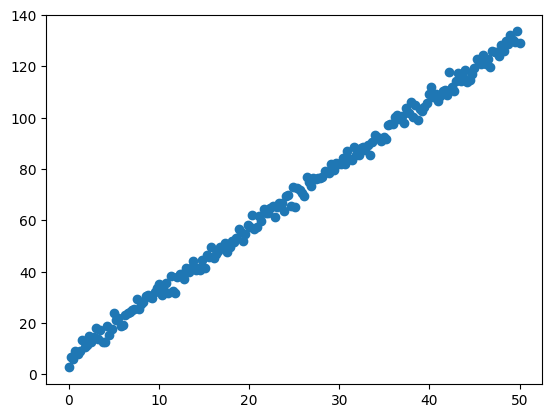

In [51]:
plt.scatter(X,y)

In [59]:
class LinearRegressionLoop:
  def __init__(self, learning_rate=1e-3):
    self.lr = learning_rate
    self.m = 0.0
    self.b = 0.0
  def forward(self, x):
    #mx +b
    return self.m*x + self.b
  def mse(self, y, y_pred):
    # (y-y_pred)^2
    m = len(y)
    s = 0.0
    for i in range(len(y)):
      p = y_pred[i]
      t = y[i]
      s += (p-t)**2
    return s/m
  def fit(self, X,y, epochs = 50000):
    X = np.asarray(X, dtype = "float64").ravel()
    y = np.asarray(y, dtype = "float64").ravel()
    m = len(y)
    for epoch in range(epochs):
      y_pred = np.empty_like(y)
      #print(X.shape)
      for i in range(m):
        y_pred[i] = self.forward(X[i])

      error = self.mse(y_pred, y)

      dm = 0.0
      db = 0.0
      for i in range(m):
          diff = y_pred[i] - y[i]
          dm += diff * X[i]
          db += diff

      dm /= m
      db /= m

      self.m -= self.lr * dm
      self.b -= self.lr * db
      if epoch % 500 ==0:
        print(f"epoch {epoch} error {error:.4f}")


model = LinearRegressionLoop(learning_rate = 0.001)
#print(df["X"].shape)
model.fit(X, y)

epoch 0 error 6133.2100
epoch 500 error 13.3608
epoch 1000 error 11.3666
epoch 1500 error 9.8162
epoch 2000 error 8.6107
epoch 2500 error 7.6735
epoch 3000 error 6.9448
epoch 3500 error 6.3782
epoch 4000 error 5.9378
epoch 4500 error 5.5953
epoch 5000 error 5.3290
epoch 5500 error 5.1220
epoch 6000 error 4.9610
epoch 6500 error 4.8359
epoch 7000 error 4.7386
epoch 7500 error 4.6630
epoch 8000 error 4.6041
epoch 8500 error 4.5584
epoch 9000 error 4.5229
epoch 9500 error 4.4952
epoch 10000 error 4.4737
epoch 10500 error 4.4570
epoch 11000 error 4.4440
epoch 11500 error 4.4339
epoch 12000 error 4.4261
epoch 12500 error 4.4200
epoch 13000 error 4.4152
epoch 13500 error 4.4115
epoch 14000 error 4.4087
epoch 14500 error 4.4064
epoch 15000 error 4.4047
epoch 15500 error 4.4033
epoch 16000 error 4.4023


KeyboardInterrupt: 

In [41]:
class LinearRegressionLoop:
  def __init__(self, learning_rate=1e-3):
    self.lr = learning_rate
    self.m = 0.0
    self.b = 0.0
  def forward(self, x):
    #mx +b
    return self.m*x + self.b
  def mse(self, y, y_pred):
    # (y-y_pred)^2
    m = len(y)
    return np.sum((y-y_pred) ** 2) / (m)
  def backward(self, X, y, y_pred,error):
    m = len(y)
    difference = y_pred -y
    dw = 2/m* np.dot(X, difference)
    db = 2/m* np.sum(difference)
    return dw, db

  def fit(self, X,y, epochs = 100000):
    X = np.asarray(X, dtype = "float64")
    y = np.asarray(y, dtype = "float64")
    m = len(y)
    for epoch in range(epochs):
      y_pred = self.forward(X)
      #print(X.shape)
      error = self.mse(y_pred, y)
      dm, db = self.backward(X,y,y_pred, error)

      self.m -= self.lr * dm
      self.b -= self.lr * db
      if epoch % 1000 == 0:
        print(f"epoch {epoch} error {error:.4f}")
  def predict(self, x):
    return self.m*x + self.b


model = LinearRegressionLoop(learning_rate = 0.0001)
#print(df["X"].shape)
model.fit(X, y)
print(model.m)
print(model.b)
model.predict(1000)

epoch 0 error 6152.7676
epoch 1000 error 15.1509
epoch 2000 error 14.0492
epoch 3000 error 13.0531
epoch 4000 error 12.1523
epoch 5000 error 11.3378
epoch 6000 error 10.6013
epoch 7000 error 9.9353
epoch 8000 error 9.3331
epoch 9000 error 8.7885
epoch 10000 error 8.2961
epoch 11000 error 7.8509
epoch 12000 error 7.4483
epoch 13000 error 7.0842
epoch 14000 error 6.7551
epoch 15000 error 6.4574
epoch 16000 error 6.1882
epoch 17000 error 5.9449
epoch 18000 error 5.7248
epoch 19000 error 5.5258
epoch 20000 error 5.3459
epoch 21000 error 5.1831
epoch 22000 error 5.0360
epoch 23000 error 4.9030
epoch 24000 error 4.7827
epoch 25000 error 4.6739
epoch 26000 error 4.5755
epoch 27000 error 4.4866
epoch 28000 error 4.4062
epoch 29000 error 4.3335
epoch 30000 error 4.2677
epoch 31000 error 4.2082
epoch 32000 error 4.1545
epoch 33000 error 4.1058
epoch 34000 error 4.0619
epoch 35000 error 4.0221
epoch 36000 error 3.9862
epoch 37000 error 3.9537
epoch 38000 error 3.9243
epoch 39000 error 3.8977
epoc

np.float64(2503.568364818522)

In [45]:
def r_squared(y_true, y_pred):
  assert len(y_true) == len(y_pred)
  mean_y = np.mean(y_true)
  ss = np.sum((y_true - mean_y)**2)
  ss_residual = np.sum((y_true-y_pred)**2)
  print(ss)
  print(ss_residual)
  r2 = 1 - (ss_residual/ss)
  return r2
y_pred = model.predict(X)
print(r_squared(y, y_pred))

262720.58471678477
729.4630234865831
0.997223426461718
